In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

# Select a style, it will affect all subsequent plots.
plt.style.use('fivethirtyeight')

# Add this after your imports to configure Jupyter to 
# display your plots.
%matplotlib inline

In [2]:
nd_football_roster = pd.read_csv('./data/nd-football-2021-roster.csv')
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')


# Histograms

### Overlaying Multiple Histograms
Just like we are able to plot multiple lines on a single axes, we can plot multiple histograms. 

(array([ 1.,  2.,  5., 12., 24., 24., 42., 37., 39., 32., 46., 45., 43.,
        42., 40., 53., 57., 82., 72., 33.]),
 array([ 7.2 , 10.69, 14.18, 17.67, 21.16, 24.65, 28.14, 31.63, 35.12,
        38.61, 42.1 , 45.59, 49.08, 52.57, 56.06, 59.55, 63.04, 66.53,
        70.02, 73.51, 77.  ]),
 <BarContainer object of 20 artists>)

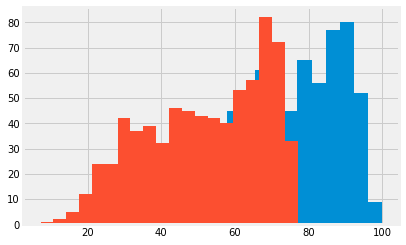

In [3]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20)

That is pretty cool, but there are a number of things that are not ideal with our plot:
1. The low temperatures are in red. 
2. The low temperatures are covering up the high temperatures.
3. There is no legend to clearly deliniate which is which.

Let's combine what we've learned so far about Matplotlib to address these issues.

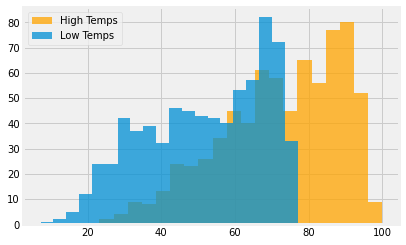

In [4]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20, 
    label='High Temps', # Use label to specify legend name
    color='orange', # Override the default color
    alpha=.75 # Adjust alpha to allow both datasets to appear
)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20, 
    label='Low Temps', # Use label to specify legend name
    alpha=.75 # Adjust alpha to allow both datasets to appear
)

# Enable the legend
axes.legend()

## Activity

### Two Histograms

* Create two DataFrames by extracting flight details of 'AS' (Alaskan Airlines) and 'HA' (Hawaiin Airlines)



* Plot the histograms of the distance ('DISTANCE') travelled by each of 'AS' and 'HA' airlines
    * Adjust the parameters for each histogram
        * bins
        * range
        * color
        * alpha (opacity)
        * label
    * Provide a legend on the upper right corner to indicate which airline

In [5]:
flights = pd.read_csv("./data/flight_sample.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [7]:
# Select rows based on the AIRLINE
mask_AS = (flights['AIRLINE'] == 'AS')
flights_AS = flights[mask_AS]

flights_HA = flights[ (flights['AIRLINE'] == 'HA') ]

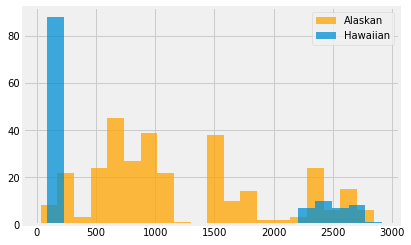

In [8]:
figure, axes = plt.subplots()
axes.hist(
    flights_AS['DISTANCE'], 
    bins=20, 
    label='Alaskan', # Use label to specify legend name
    color='orange', # Override the default color
    alpha=.75 # Adjust alpha to allow both datasets to appear
)
axes.hist(
    flights_HA['DISTANCE'], 
    bins=20, 
    label='Hawaiian', # Use label to specify legend name
    alpha=.75 # Adjust alpha to allow both datasets to appear
)

# Enable the legend
axes.legend()

## Two Dimensional Histograms

In the previous class, we demonstrated how to generate a histogram on a single variable in a data set. In this section, we are going to cover how you can create 2 dimensional histograms to visualize the relationship between two variables in a data set.

We will start by going back to our ND football roster and create a plot that shows the relationships between player heights and weights.

Text(0, 0.5, 'Weight')

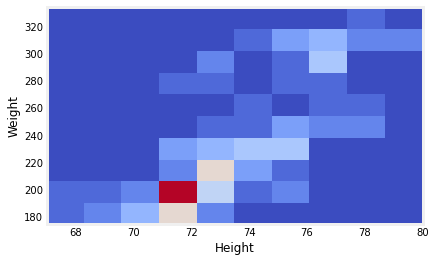

In [9]:
figure, axes = plt.subplots()
image = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'], 
    cmap='coolwarm', # Notice we use `cmap` to specify color range
)

axes.set_xlabel("Height")
axes.set_ylabel("Weight")

If you recall from our previous class, we have to pass an image to the *`figure.colorbar()`* method in order for it to work correctly.

Unlike the *`axes.scatter()`* method, the *`axes.hist2d`* method returns a 4 element tuple. The last element is the image reference that we need to pass into *`figure.colorbar()`*. **This is a idiosyncratic thing to keep track**

Text(0, 0.5, 'Weight')

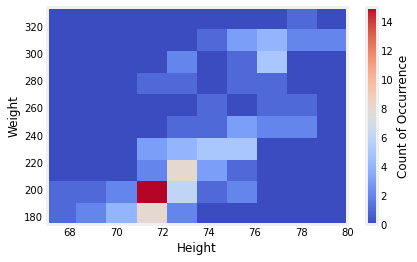

In [14]:
figure, axes = plt.subplots()

image = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'], 
    cmap='coolwarm')

# Pass in the 4th element (index 3)
figure.colorbar(image[3], label='Count of Occurrence')


axes.set_xlabel("Height")
axes.set_ylabel("Weight")

### Reduce clutter with the `cmin` & `cmax` arguments
In both of our examples, there is a lot of visual noise that comes from the bins that have 0 occurences. We can remove this clutter by specifying the `cmin` (count minimum) argument.

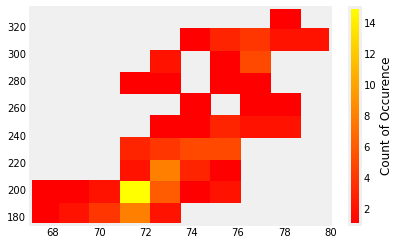

In [22]:
figure, axes = plt.subplots()
results = axes.hist2d(
    nd_football_roster['Height'],
    nd_football_roster['Weight'],
    cmap='autumn',
    cmin=1)

figure.colorbar(results[3], label='Count of Occurence')

## Activity

### 2D Histograms

* Plot the 2D histograms of the distance ('DISTANCE') travelled and 'TAXI_IN' time. 
    * Adjust the parameters for each histogram
        * cmin
        * cmap
        * bins
        * range
    * Provide a colorbar for 'Number of flights'

In [23]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [26]:
flights.isna().sum()

YEAR               0
MONTH              0
DAY                0
DAY_OF_WEEK        0
AIRLINE            0
FLIGHT_NUMBER      0
TAXI_IN          171
TAXI_OUT         166
DISTANCE           0
dtype: int64

In [27]:
flights.dropna(inplace=True)

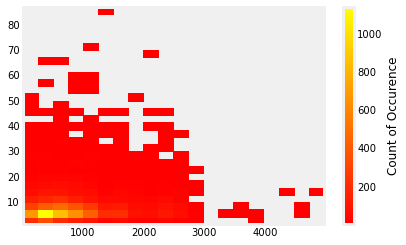

In [30]:
figure, axes = plt.subplots()
results = axes.hist2d(
    flights['DISTANCE'],
    flights['TAXI_IN'],
    cmap='autumn',
    bins = (20, 30),
    cmin=1)

figure.colorbar(results[3], label='Count of Occurence')

# Matplotlib Subplots

## Introduction
In this section we are going to learn how to create multiple plots that are connected to each other in a single *`figure`* object. In Matplotlib, these are called "subplots". You may also think of them as linked plots.

In [31]:
nd_football_roster = pd.read_csv('./data/nd-football-2021-roster.csv')
seattle_weather_2015_2016 = pd.read_csv(
    './data/seattle_weather_2015_2016.csv')

## Generating Subplots
You've actually been using the method needed to create a grid of subplots from the very beginning of this chapter.

We've used **`plt.subplots()`** function to return a single figure and axes objects, but it is also capable of generating a grid of axes objects with supplied with the correct arguments.

In the following example, I will generate a 1x2 grid of axes for us to work with.

<class 'numpy.ndarray'>
[<AxesSubplot:> <AxesSubplot:>]


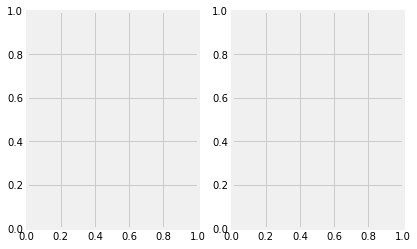

In [34]:
figure, axes = plt.subplots(1, 2)
print(type(axes), axes, sep='\n')

Notice that the *`axes`* variable now points to a Numpy array filled with **`AxesSubplot`** objects. If we attempt to plot something on the *`axes`* variable itself it will fail because a Numpy array can't plot anything!

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

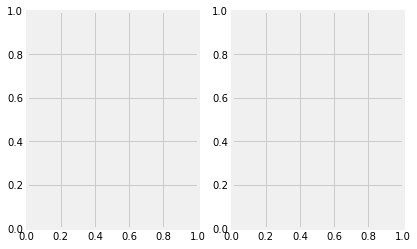

In [35]:
figure, axes = plt.subplots(1, 2)
axes.scatter(nd_football_roster['Height'])

Instead we have to address the specific **`AxesSubplot`** objects inside of the Numpy array that we want to plot with:

Text(0.5, 1.0, 'ND Football Player Weights')

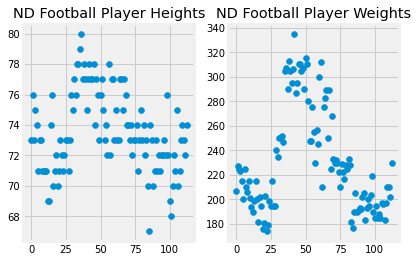

In [36]:
figure, axes = plt.subplots(1, 2)
axes[0].scatter(
    nd_football_roster.index, nd_football_roster['Height'])
axes[0].set_title('ND Football Player Heights')

axes[1].scatter(
    nd_football_roster.index, nd_football_roster['Weight'])
axes[1].set_title('ND Football Player Weights')

A potentially confusing case arises when you create a grid with multiple rows as this results in a 2 dimensional Numpy array being returned from the *`plt.subplots()`* method.

When you have this condition, you have to specify both the row and column indices of the *`AxesSubplot`* objects you want to plot with.

In the following example, I will only plot on the top-left and bottom-right subplots to demonstrate.

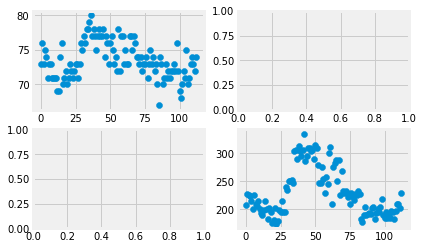

In [37]:
figure, axes = plt.subplots(2, 2)
axes[0, 0].scatter(
    nd_football_roster.index, nd_football_roster['Height'])

axes[1, 1].scatter(
    nd_football_roster.index, nd_football_roster['Weight'])

### Sharing X/Y Axis between Subplots
In our examples above, each subplot is given a separate x and y axis. This can become somewhat cluttered as you can see.

The *`plt.subplots()`* method gives use the ability to share x/y axis between multiple subplots via the `sharex` and `sharey` arguments.

Let's show how we might use this with some Seattle weather subplots.

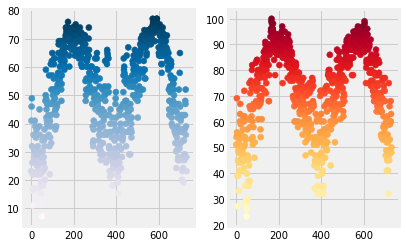

In [38]:
# Here we'll generate two plots
# The low/high temps for Seattle
figure, axes = plt.subplots(1, 2)

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes[1].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

Each of the subplots has been given its own x-axis and y-axis. Let's specify that they should share their y-axis and see how that changes the appearance of our figure:

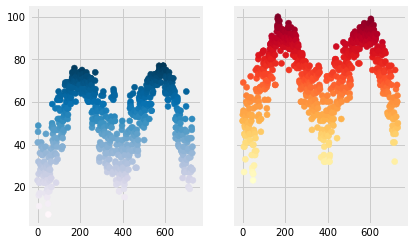

In [39]:
figure, axes = plt.subplots(1, 2, sharey=True)

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes[1].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')

Very nice. You can see now that there is a single y-axis that is shared between the two subplots. Matplotlib automatically expands the values in the axis to the range necessary to cover the two subplots.

Doing this not only reduced the complexity of the two plots, but also visually aligned the data so that the low temperatures appear lower than the high temperatures.

# Activity

### Subplots

We will use seattle_weather_2015_2016.csv for this activity

* Use subplots to plot the following two plots in a single *figure* 
    * Plot a scatter plot of avgwindspeed with the color of the points indicating the speed of wind
    * Plot a histogram of histogram of the avgwindspeed.
    * Make sure you provide the following metadata for **each** of the plot
        * Set the title
        * Set the labels for x-axis and y-axis
    
* Does it make sense to share the y-axis (sharey) in this case? 

**NOTE** ``plt.tight_layout(w_pad = 3)`` might help you create some space between the plots so that the labels may not overlap with the plots. You can increase or decrease the number 3


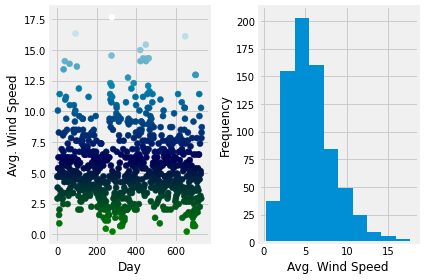

In [48]:
figure, axes = plt.subplots(1, 2)

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['avgwindspeed'], 
             c=seattle_weather_2015_2016['avgwindspeed'], 
             cmap='ocean')
axes[0].set_xlabel("Day")
axes[0].set_ylabel("Avg. Wind Speed")

axes[1].hist(seattle_weather_2015_2016['avgwindspeed'])
axes[1].set_xlabel("Avg. Wind Speed")
axes[1].set_ylabel("Frequency")
plt.tight_layout(w_pad = 1)

### Four Subplots

We will use flight_sample.csv for this activity

* Use subplots to plot the following 4 (2x2) plots in a single figure

    * Plot the histogram of the DISTANCE travelled by all the flights
    * Plot the histogram of the DISTANCE travelled by **only** UA flights
    * Plot the histogram of the DISTANCE travelled by **only** HA flights
    * Plot the histogram of the DISTANCE travelled by **only** B6 flights
* Does it make sense to share any axis (sharex or sharey) in this case? 

In [49]:
flights = pd.read_csv("./data/flight_sample.csv")

In [50]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [51]:
flights_UA = flights[(flights['AIRLINE'] == 'UA')]

flights_HA = flights[(flights['AIRLINE'] == 'HA')]

flights_B6 = flights[(flights['AIRLINE'] == 'B6')]

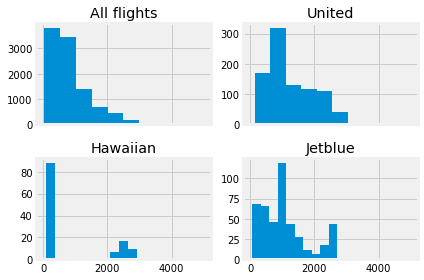

In [57]:
figure, axes = plt.subplots(2,2, sharex = True)

axes[0,0].hist(flights['DISTANCE'])
axes[0,0].set_title("All flights")

axes[0,1].hist(flights_UA['DISTANCE'])
axes[0,1].set_title("United")

axes[1,0].hist(flights_HA['DISTANCE'])
axes[1,0].set_title("Hawaiian")

axes[1,1].hist(flights_B6['DISTANCE'])
axes[1,1].set_title("Jetblue")
plt.tight_layout(w_pad = 1)

# Plotting with Seaborn 

Seaborn provides more sophistication on top of Matplotlib that makes them produce plots that more statistical and integrates with the functionality provided by Pandas DataFrame 

In [58]:
import seaborn as sns

Remember, plotting of histogram using Matplotlib from above. 

In [59]:
seattle_weather_2015_2016 = pd.read_csv("./data/seattle_weather_2015_2016.csv")

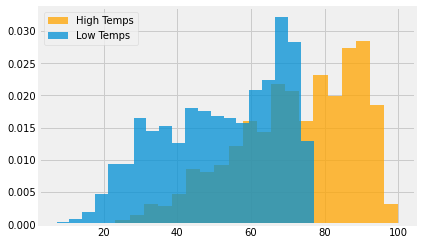

In [60]:
figure, axes = plt.subplots()
axes.hist(
    seattle_weather_2015_2016['high_temp'], 
    bins=20, 
    label='High Temps', # Use label to specify legend name
    color='orange', # Override the default color
    alpha=.75, # Adjust alpha to allow both datasets to appear
    density=True # Set y-axis as probability. 
)
axes.hist(
    seattle_weather_2015_2016['low_temp'], 
    bins=20, 
    label='Low Temps', # Use label to specify legend name
    alpha=.75, # Adjust alpha to allow both datasets to appear
    density=True # Set y-axis as probability. 
)

# Enable the legend
axes.legend()

Note, that above when you set `density=True`, the y-axis doesn't represent the frequency but the probability of falling in that bucket.

With **seaborn** we can plot these histogram and also a curve that shows the distribution. 

In [ ]:
sns.histplot?

Text(0, 0.5, 'Density')

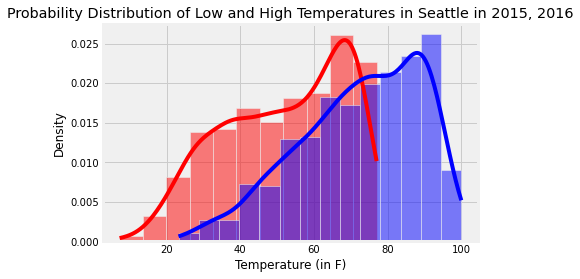

In [61]:
figure, axes = plt.subplots()

sns.histplot(seattle_weather_2015_2016['low_temp'], ax= axes, kde=True, color = 'red', stat = 'density')
sns.histplot(seattle_weather_2015_2016['high_temp'], ax = axes, kde=True, color = 'blue', stat = 'density')

axes.set_title("Probability Distribution of Low and High Temperatures in Seattle in 2015, 2016")
axes.set_xlabel("Temperature (in F)")
axes.set_ylabel("Density")

### Pair plots

These are very useful when you start working with any data. You might want to understand how each variable is related to one another. 

Seaborn is smart to figure out DataFrames which are numbers and only compare across them. 

In [62]:
seattle_weather_2015_2016.head()

,date,low_temp,high_temp,precipitation,snowfall,snowdepth,avgwindspeed,fog,mist,rain,ice,snow,freezingrain,thunder,highwind,hail
0,1/1/15,23.2,51.1,0.00,0.0,0.0,4.70,No,No,No,No,No,No,No,No,No
1,1/2/15,41.0,54.0,0.00,0.0,0.0,2.91,No,No,No,No,No,No,No,No,No
2,1/3/15,46.0,51.1,0.16,0.0,0.0,3.80,Yes,No,No,No,No,No,No,No,No
3,1/4/15,48.9,69.1,0.29,0.0,0.0,10.07,Yes,No,No,No,No,No,No,No,No
4,1/5/15,32.0,55.9,0.00,0.0,0.0,5.37,No,No,No,No,No,No,No,No,No


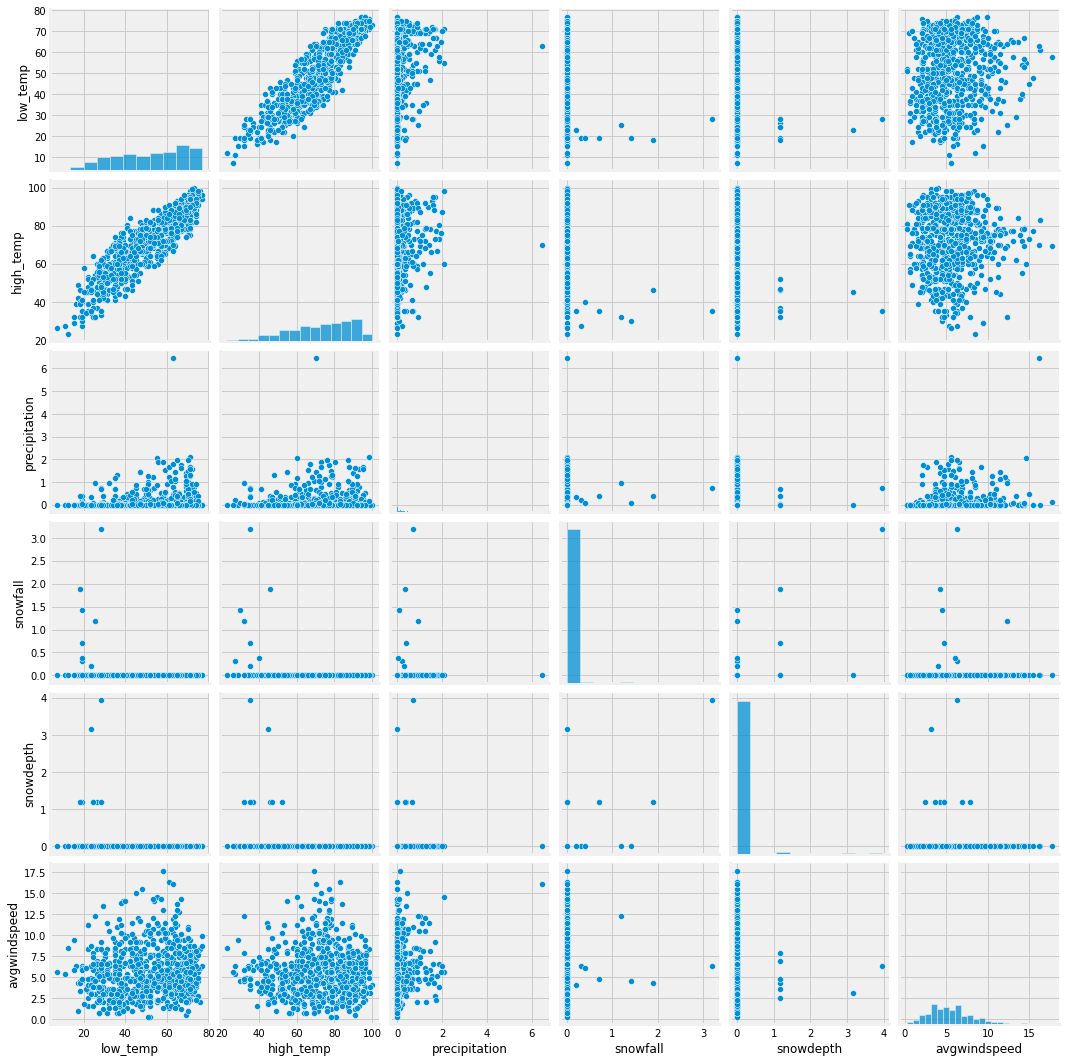

In [63]:
sns.pairplot(seattle_weather_2015_2016)

### Joint plot

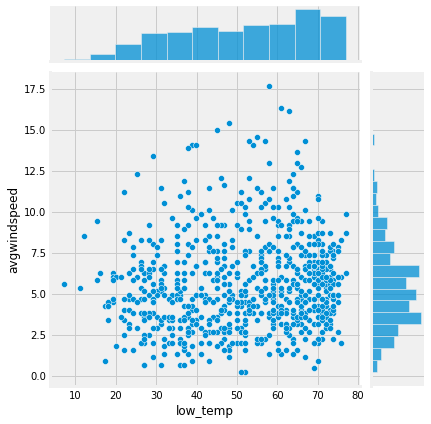

In [64]:
sns.jointplot(x = "low_temp", y = "avgwindspeed", data=seattle_weather_2015_2016)

## Activty

Use seaborn to produce these plots. 

1. Select the flight details of American Airlines ('AA') and United Airlines ('UA')
2. Plot the histogram with probability density plot for the distance of the flights by these two airlines


In [65]:
flights = pd.read_csv("./data/flight_sample.csv")
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAXI_IN,TAXI_OUT,DISTANCE
0,2015,8,19,3,EV,3260,7.0,20.0,1091
1,2015,9,23,3,WN,3050,4.0,9.0,837
2,2015,10,16,5,AA,1382,13.0,25.0,761
3,2015,1,19,1,WN,4274,5.0,23.0,1547
4,2015,4,22,3,WN,2237,5.0,18.0,872


In [66]:
flights_AA = flights[(flights['AIRLINE'] == 'AA')]

flights_UA = flights[(flights['AIRLINE'] == 'UA')]

Text(0, 0.5, 'Density')

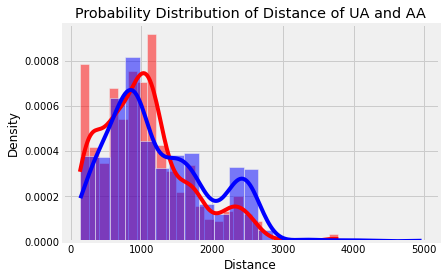

In [67]:
figure, axes = plt.subplots()

sns.histplot(flights_AA['DISTANCE'], ax= axes, kde=True, color = 'red', stat = 'density')
sns.histplot(flights_UA['DISTANCE'], ax = axes, kde=True, color = 'blue', stat = 'density')

axes.set_title("Probability Distribution of Distance of UA and AA")
axes.set_xlabel("Distance")
axes.set_ylabel("Density")

## Activity

* Pairplot on flights DataFrame

In [68]:
# pairplots are not good working with missing data, so we dropping it. 
# EASY TO DO BUT NOT ALWAYS A RIGHT THING TO DO 
flights = pd.read_csv("./data/flight_sample.csv")
flights.dropna(inplace=True)

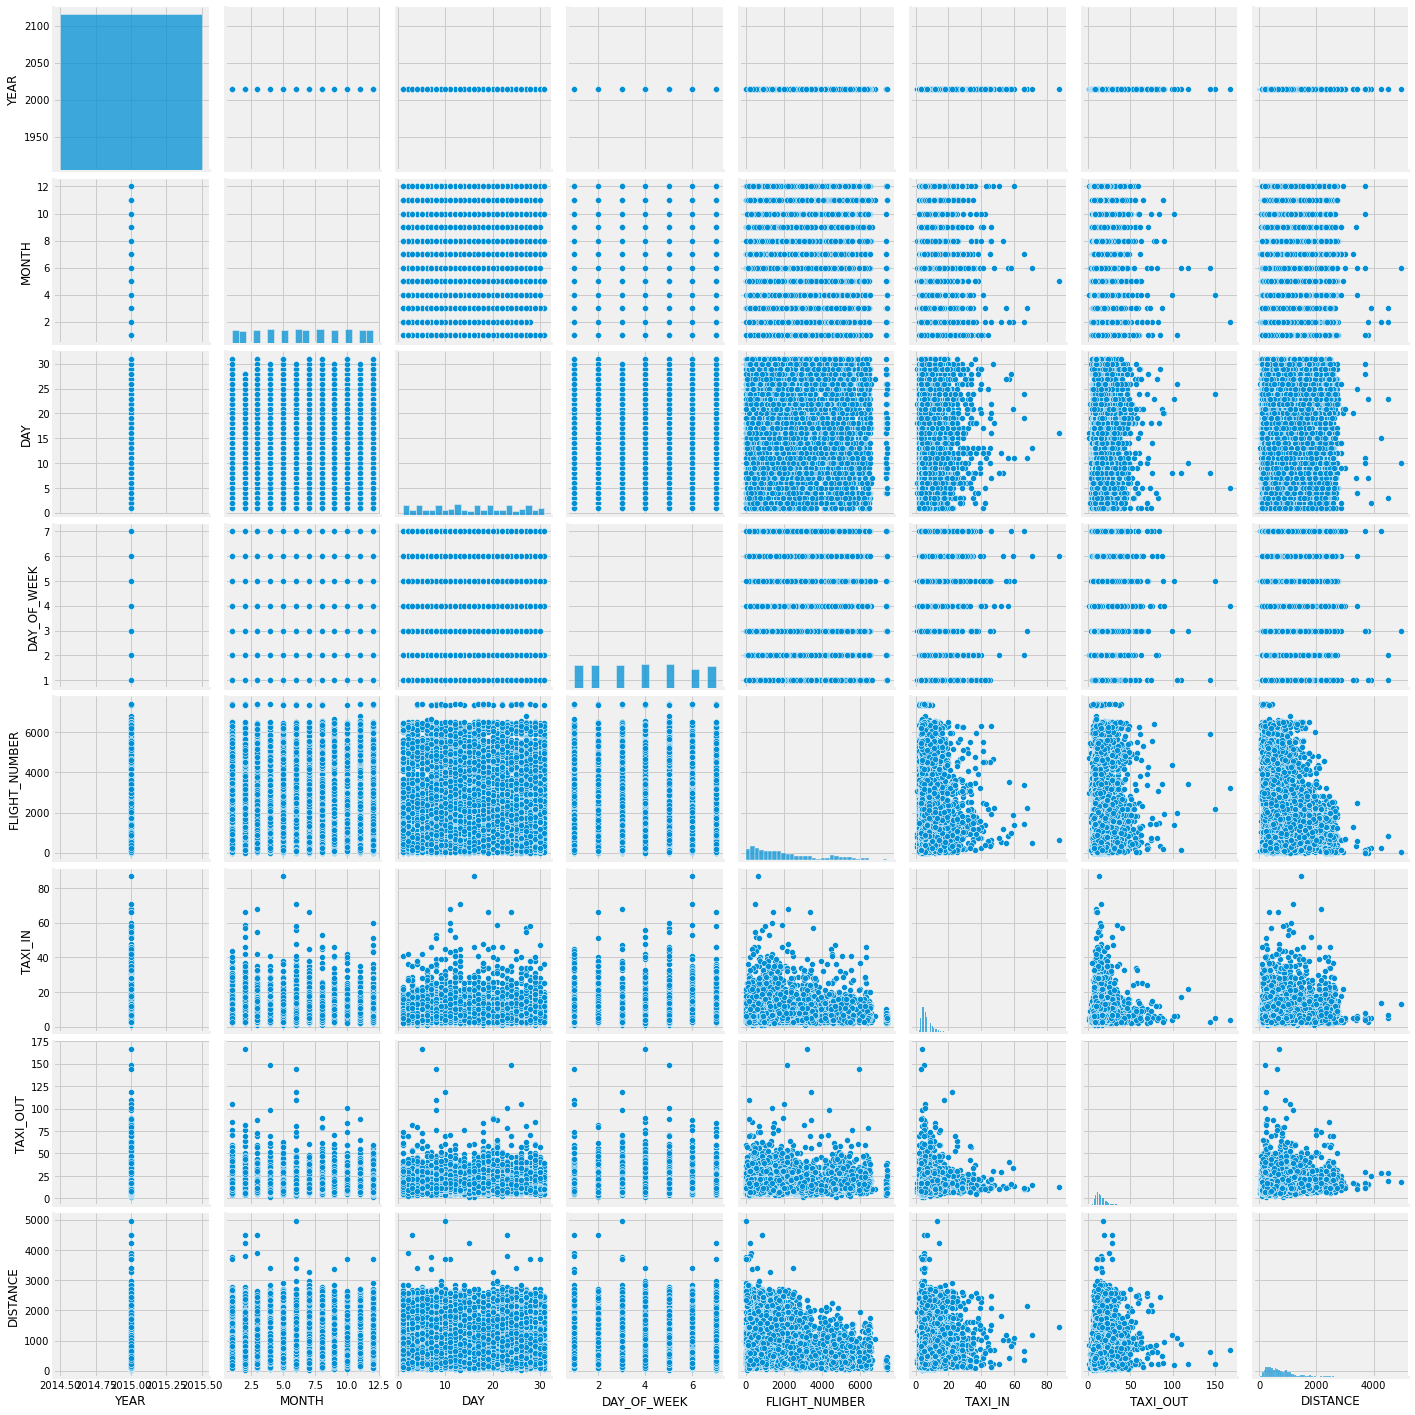

In [69]:
sns.pairplot(flights)

## Activity

* Joint plot between DISTANCE and TAXI_IN time for flights data
* Joint plot between TAXI_OUT and TAXI_IN time for flights data

# Matplotlib Advanced Customizations

## Adjusting Plot Sizes
Often times, you will want to adjust the size of your plots. There are a couple of different ways that you can accomplish this.

In [ ]:
figure, axes = plt.subplots()
axes.scatter(nd_football_roster.index, nd_football_roster['Height'])

# You can use the `figure.set_size_inches()` method to 
# specify the desired width/height of your figure.
# If the requested size is too big for the Jupyter 
# display, Matplotlib will display a plot that still
# has the correct display ratio.
figure.set_size_inches(10, 4)

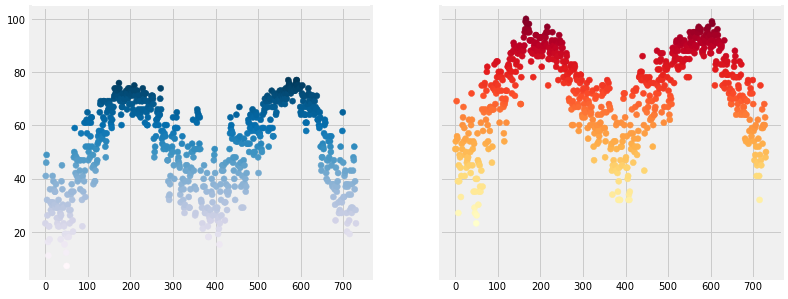

In [72]:
# You can also pass the `figsize` argument to `plt.subplots()`
# to accomplish the same effect.
figure, axes = plt.subplots(1, 2, sharey=True, figsize=(12,5))

axes[0].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes[1].scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['high_temp'],
             c=seattle_weather_2015_2016['high_temp'], 
             cmap='YlOrRd')


## Adding Text to Plots
Sometimes, you may want to add explanatory text to your plots.

In its most basic usage, you simply specify x and y values and the text that you want to display.

Text(175, 15, 'WAY TOO COLD')

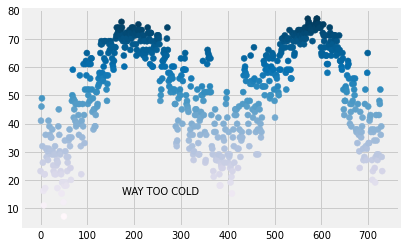

In [73]:
figure, axes = plt.subplots()

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes.text(175, 15,'WAY TOO COLD')


You can also specify a number of parameters to customize the text's position and appearance:

Text(175, 15, 'WAY TOO COLD')

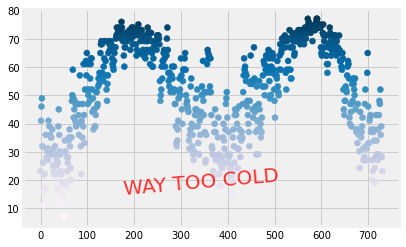

In [74]:
figure, axes = plt.subplots()

axes.scatter(seattle_weather_2015_2016.index, 
             seattle_weather_2015_2016['low_temp'], 
             c=seattle_weather_2015_2016['low_temp'], 
             cmap='PuBu')

axes.text(175, 15,'WAY TOO COLD', 
          size=20, # Adjust the size
          alpha=.8, # Adjust opacity
          color='red', # Change the color
          rotation=5 # Add a rotation
         )

There are a lot more customizations and advanced plotting possible using matplotlib

1. Adding Annotations (Text with Lines)
2. Customizing Tick Marks
    * Modifying the Number & Position of Tick Marks
3. Visualizing Error Bars
4. Fancy texts on your plots, including mathematical notations
5. Three dimensional plotting
6. Geographic Plotting

# Three-Dimensional Plotting in Matplotlib

Matplotlib was initially designed with only two-dimensional plotting in mind.
Around the time of the 1.0 release, some three-dimensional plotting utilities were built on top of Matplotlib's two-dimensional display, and the result is a convenient (if somewhat limited) set of tools for three-dimensional data visualization.
three-dimensional plots are enabled by importing the ``mplot3d`` toolkit, included with the main Matplotlib installation:

In [ ]:
from mpl_toolkits import mplot3d

Once this submodule is imported, a three-dimensional axes can be created by passing the keyword ``projection='3d'`` to any of the normal axes creation routines:

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

With this three-dimensional axes enabled, we can now plot a variety of three-dimensional plot types. 
Three-dimensional plotting is one of the functionalities that benefits immensely from viewing figures interactively rather than statically in the notebook; recall that to use interactive figures, you can use ``%matplotlib notebook`` rather than ``%matplotlib inline`` when running this code.

## Three-dimensional Points and Lines

The most basic three-dimensional plot is a line or collection of scatter plot created from sets of (x, y, z) triples.
In analogy with the more common two-dimensional plots discussed earlier, these can be created using the ``ax.plot3D`` and ``ax.scatter3D`` functions.
The call signature for these is nearly identical to that of their two-dimensional counterparts, so you can refer to [Simple Line Plots](04.01-Simple-Line-Plots.ipynb) and [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb) for more information on controlling the output.
Here we'll plot a trigonometric spiral, along with some points drawn randomly near the line:

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.scatter3D(flights['TAXI_IN'], flights['TAXI_OUT'], flights['DISTANCE'], 'gray')

ax.set_zlabel('DISTANCE')
ax.set_xlabel('TAXI_IN')
ax.set_ylabel('TAXI_OUT')
